In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]
y = df["Drug"]

# Ubah kategori ke numerik
X = pd.get_dummies(X, drop_first=True)
X.head()


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,False,False,False,False
1,47,13.093,True,True,False,False
2,47,10.114,True,True,False,False
3,28,7.798,False,False,True,False
4,61,18.043,False,True,False,False


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [5]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



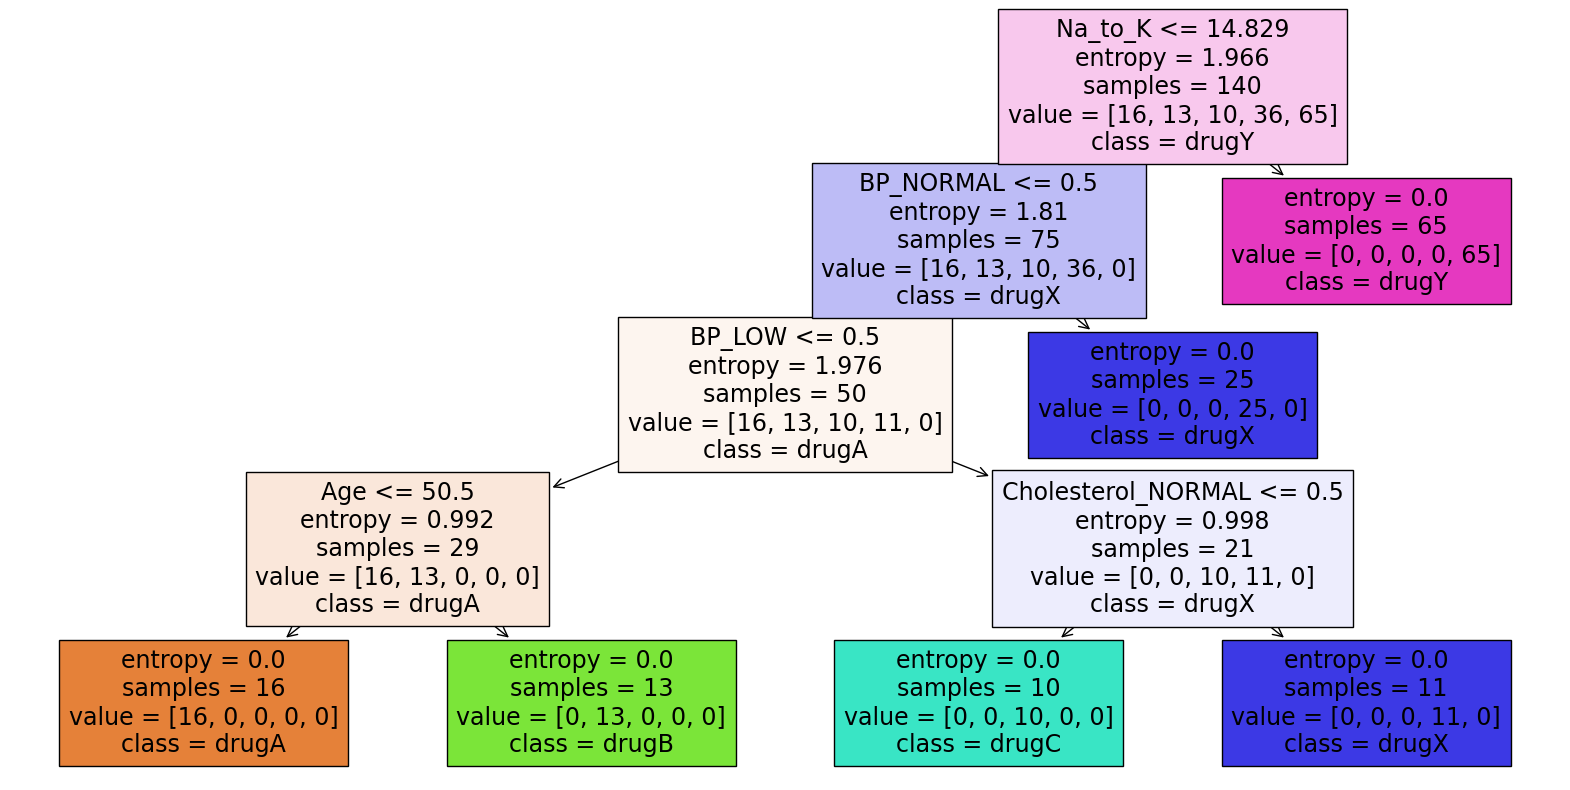

In [8]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()


In [14]:
# cek nama kolom sebenarnya
print(X.columns)


Index(['Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL'], dtype='object')


In [14]:
sample = pd.DataFrame({
    'Age': [23],
    'Na_to_K': [25.355],
    'Sex_M': [0],             # Female
    'BP_LOW': [0],            # bukan LOW
    'BP_NORMAL': [0],         # bukan NORMAL (berarti HIGH)
    'Cholesterol_NORMAL': [0] # 0 = HIGH
})

print("Prediksi Obat:", clf.predict(sample)[0])


Prediksi Obat: drugY


In [15]:
import pickle

# setelah clf.fit(X_train, y_train)
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
